## Parse Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def list_to_plate(lst: pd.Series) -> pd.DataFrame:
    new_index = pd.MultiIndex.from_tuples([(i[0], int(i[1:])) for i in lst.index])
    plate =  pd.Series(lst.values, index=new_index).unstack()
    return plate

def plate_to_list(plate: pd.DataFrame) -> pd.Series:
    s = plate.stack()
    s.index = [f'{row}{col}' for row, col in s.index]
    return s

def set_plate_axes(df: pd.DataFrame) -> pd.DataFrame:
    """ Given a dataframe representing a multiwell plate, set axes to be proper plate axes. """

    df.columns = range(1, len(df.columns)+1)
    df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'][:len(df.index)]
    return df

def bars(df, **kwargs):
    ax = sns.barplot(data=df,alpha=0.8, **kwargs)
    ax = sns.stripplot(data=df, ax=ax, size=6, dodge=True, legend=False,  edgecolor='black', linewidth=1, **kwargs)
    if 'hue' in kwargs.keys():
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    return ax


In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

from pathlib import Path
DRIVE_FOLDER = Path('/content/drive/Shared drives/Student Biolab Zurich/iDEC/iDEC 2024/Lab results/Phage Propagation Assays/20240820_logic_validation/')


cts = pd.read_csv(DRIVE_FOLDER / '20240820_qPCR_iDEC.txt', sep='\t', header=1)[['Pos', 'Cp']]
layout_plate1 = pd.read_excel(DRIVE_FOLDER / 'layout_plate1.xlsx', header=None)
layout_plate2 = pd.read_excel(DRIVE_FOLDER / 'layout_plate2.xlsx', header=None)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cts = cts.rename(columns={'Pos': 'well', 'Cp': 'cp'})
cts = cts.set_index('well').cp
cts = list_to_plate(cts)
cts


,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
A,17.53,18.77,17.68,18.63,20.66,20.55,20.15,20.84,18.58,18.60,...,19.12,19.45,21.17,20.61,20.30,20.58,19.06,19.43,19.68,18.48
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,26.76,22.76,24.70,23.82,NaN,NaN,30.10,NaN
C,17.65,17.96,16.72,17.74,20.53,19.99,20.26,18.84,18.52,18.59,...,18.35,18.61,19.87,19.22,19.22,19.14,19.11,19.21,19.45,19.62
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.00,NaN,35.00,...,NaN,35.00,35.00,28.16,29.74,NaN,26.37,31.74,NaN,NaN
E,17.57,17.14,17.26,16.92,20.31,20.64,20.83,20.56,18.03,17.10,...,15.59,16.57,17.17,17.95,18.54,17.84,16.46,16.57,16.04,16.57
F,NaN,NaN,NaN,NaN,NaN,35.00,NaN,NaN,NaN,NaN,...,NaN,NaN,29.28,26.61,NaN,NaN,23.67,35.00,30.02,NaN
G,17.61,17.76,17.35,17.86,20.60,19.47,20.67,19.68,18.42,18.84,...,22.57,22.24,24.45,24.08,24.46,24.44,22.54,22.53,22.28,22.56
H,NaN,NaN,NaN,NaN,NaN,35.00,NaN,NaN,NaN,16.93,...,NaN,17.15,27.69,27.00,NaN,NaN,NaN,NaN,NaN,NaN
I,16.98,17.84,16.56,17.83,21.11,21.17,21.52,20.98,18.78,18.29,...,25.18,25.21,25.68,25.85,25.76,25.79,24.97,25.29,25.24,25.18
J,NaN,NaN,29.38,NaN,NaN,30.72,NaN,35.00,NaN,19.99,...,NaN,NaN,31.01,NaN,28.66,21.92,29.66,NaN,30.54,NaN


In [4]:
cts_plate1 = plate_to_list(set_plate_axes(cts.iloc[::2, :12])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate1['plate'] = 'plate1'
cts_plate2 = plate_to_list(set_plate_axes(cts.iloc[::2, 12:24])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate2['plate'] = 'plate2'

cts_all = pd.concat([cts_plate1, cts_plate2])
cts_all

,well,cp,plate
0,A1,17.53,plate1
1,A2,18.77,plate1
2,A3,17.68,plate1
3,A4,18.63,plate1
4,A5,20.66,plate1
...,...,...,...
91,H8,10.31,plate2
92,H9,13.23,plate2
93,H10,12.36,plate2
94,H11,12.03,plate2


In [5]:
def parse_plate(df, num_cols):
  pass

def parse_layout(layout: pd.DataFrame):
  idx = 0
  plates = []
  while idx < len(layout.index)-9:
    if layout.iloc[idx, 0] is not None:
      plate = set_plate_axes(layout.iloc[idx+2:idx+2+8, 1:1+12])
      print(plate)
      plate = plate_to_list(plate)
      plate.name = layout.iloc[idx,  0]
      plates.append(plate)
      idx += 11
    else:
      idx += 1
  return pd.concat(plates, axis=1)

meta_plate1 = parse_layout(layout_plate1).reset_index().rename(columns={'index': 'well'})
meta_plate1['plate'] = 'plate1'

meta_plate2 = parse_layout(layout_plate2).reset_index().rename(columns={'index': 'well'})
meta_plate2['plate'] = 'plate2'

meta = pd.concat([meta_plate1, meta_plate2]) # this only works becase meta columns are the same, which won't be the case all the time
meta

                1                2                3                4   \
A  S2060-2008/1096  S2060-2008/1096  S2060-2008/1096  S2060-2008/1096   
B  S2060-2008/1097  S2060-2008/1097  S2060-2008/1097  S2060-2008/1097   
C  S2060-2008/1098  S2060-2008/1098  S2060-2008/1098  S2060-2008/1098   
D  S2060-2008/1099  S2060-2008/1099  S2060-2008/1099  S2060-2008/1099   
E  S2060-2008/1100  S2060-2008/1100  S2060-2008/1100  S2060-2008/1100   
F  S2060-2008/1101  S2060-2008/1101  S2060-2008/1101  S2060-2008/1101   
G  S2060-2008/1102  S2060-2008/1102  S2060-2008/1102  S2060-2008/1102   
H  S2060-2008/1103  S2060-2008/1103  S2060-2008/1103  S2060-2008/1103   

                5                6                7                8   \
A  S2060-2008/1096  S2060-2008/1096  S2060-2008/1096  S2060-2008/1096   
B  S2060-2008/1097  S2060-2008/1097  S2060-2008/1097  S2060-2008/1097   
C  S2060-2008/1098  S2060-2008/1098  S2060-2008/1098  S2060-2008/1098   
D  S2060-2008/1099  S2060-2008/1099  S2060-2008/10

,well,strain,phage,substrate,level2,qpcr replicate,promoter,plate
0,A1,S2060-2008/1096,SIAH1,EGLN3 - peptide,2008,NaN,NaN,plate1
1,A2,S2060-2008/1096,SIAH1,EGLN3 - peptide,2008,r1,NaN,plate1
2,A3,S2060-2008/1096,SIAH1,EGLN3 - peptide,2008,NaN,NaN,plate1
3,A4,S2060-2008/1096,SIAH1,NaN,2008,r1,NaN,plate1
4,A5,S2060-2008/1096,SIAH2,EGLN3 - peptide,2008,NaN,NaN,plate1
...,...,...,...,...,...,...,...,...
91,G8,NaN,SIAH2,NaN,NaN,NaN,NaN,plate2
92,G9,NaN,TadA,NaN,NaN,NaN,NaN,plate2
93,G10,NaN,TadA,NaN,NaN,NaN,NaN,plate2
94,G11,NaN,TadA,NaN,NaN,NaN,NaN,plate2


In [6]:
df = pd.merge(cts_all, meta, on=['well', 'plate'])
df

,well,cp,plate,strain,phage,substrate,level2,qpcr replicate,promoter
0,A1,17.53,plate1,S2060-2008/1096,SIAH1,EGLN3 - peptide,2008,NaN,NaN
1,A2,18.77,plate1,S2060-2008/1096,SIAH1,EGLN3 - peptide,2008,r1,NaN
2,A3,17.68,plate1,S2060-2008/1096,SIAH1,EGLN3 - peptide,2008,NaN,NaN
3,A4,18.63,plate1,S2060-2008/1096,SIAH1,NaN,2008,r1,NaN
4,A5,20.66,plate1,S2060-2008/1096,SIAH2,EGLN3 - peptide,2008,NaN,NaN
...,...,...,...,...,...,...,...,...,...
187,H8,10.31,plate2,S2208,SIAH2,NaN,NaN,NaN,NaN
188,H9,13.23,plate2,S2208,TadA,NaN,NaN,NaN,NaN
189,H10,12.36,plate2,S2208,TadA,NaN,NaN,NaN,NaN
190,H11,12.03,plate2,S2208,TadA,NaN,NaN,NaN,NaN


## qPCR Replicate correlation

In [7]:
replicate_correlation = df.groupby(['plate', 'qpcr replicate']).cp.std()
bad_replicates = replicate_correlation[replicate_correlation >= 2].reset_index()
df.merge(bad_replicates, on=['plate', 'qpcr replicate'], how='right')


,well,cp_x,plate,strain,phage,substrate,level2,qpcr replicate,promoter,cp_y
0,F10,19.23,plate1,S2060-2008/1101,TadA,EGLN3 - FIADVEA,2008,r22,NaN,2.97692
1,F12,23.44,plate1,S2060-2008/1101,TadA,NaN,2008,r22,NaN,2.97692


## Compute Propgation

In [8]:
df

,well,cp,plate,strain,phage,substrate,level2,qpcr replicate,promoter
0,A1,17.53,plate1,S2060-2008/1096,SIAH1,EGLN3 - peptide,2008,NaN,NaN
1,A2,18.77,plate1,S2060-2008/1096,SIAH1,EGLN3 - peptide,2008,r1,NaN
2,A3,17.68,plate1,S2060-2008/1096,SIAH1,EGLN3 - peptide,2008,NaN,NaN
3,A4,18.63,plate1,S2060-2008/1096,SIAH1,NaN,2008,r1,NaN
4,A5,20.66,plate1,S2060-2008/1096,SIAH2,EGLN3 - peptide,2008,NaN,NaN
...,...,...,...,...,...,...,...,...,...
187,H8,10.31,plate2,S2208,SIAH2,NaN,NaN,NaN,NaN
188,H9,13.23,plate2,S2208,TadA,NaN,NaN,NaN,NaN
189,H10,12.36,plate2,S2208,TadA,NaN,NaN,NaN,NaN
190,H11,12.03,plate2,S2208,TadA,NaN,NaN,NaN,NaN


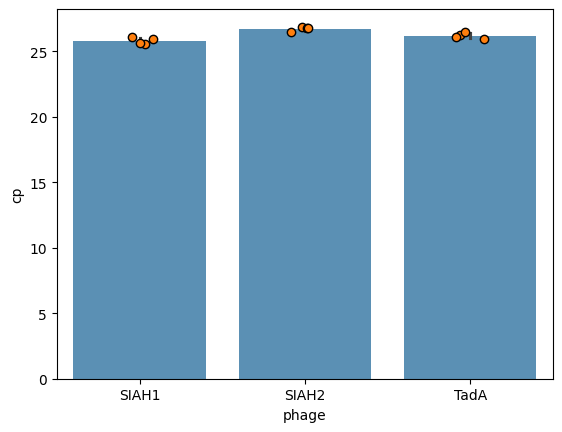

In [9]:
import seaborn as sns

_ = bars(df[df.strain == 'LB'], x='phage', y='cp')

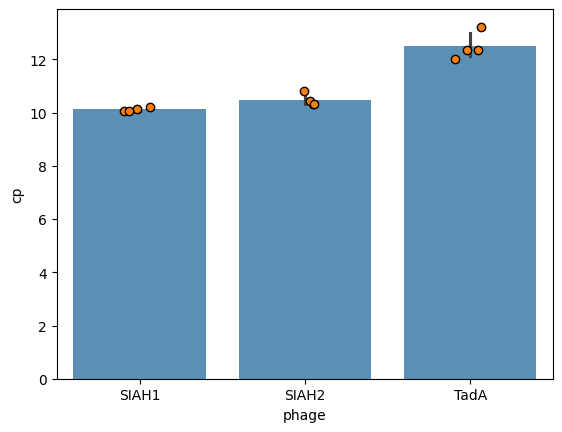

In [10]:
_ = bars(df[df.strain == 'S2208'], x='phage', y='cp')

In [11]:
df['cp_init'] = pd.NA
for phage in df.phage.unique():
  df.loc[df.phage == phage, 'cp_init'] = df[(df.phage == phage) & (df.strain == 'LB')].cp.mean()

df['fc_log2'] = df.cp_init - df.cp
df['fc'] = 2 ** df.fc_log2
df

,well,cp,plate,strain,phage,substrate,level2,qpcr replicate,promoter,cp_init,fc_log2,fc
0,A1,17.53,plate1,S2060-2008/1096,SIAH1,EGLN3 - peptide,2008,NaN,NaN,25.825,8.295,314.082554
1,A2,18.77,plate1,S2060-2008/1096,SIAH1,EGLN3 - peptide,2008,r1,NaN,25.825,7.055,132.973965
2,A3,17.68,plate1,S2060-2008/1096,SIAH1,EGLN3 - peptide,2008,NaN,NaN,25.825,8.145,283.067047
3,A4,18.63,plate1,S2060-2008/1096,SIAH1,NaN,2008,r1,NaN,25.825,7.195,146.524693
4,A5,20.66,plate1,S2060-2008/1096,SIAH2,EGLN3 - peptide,2008,NaN,NaN,26.7325,6.0725,67.298386
...,...,...,...,...,...,...,...,...,...,...,...,...
187,H8,10.31,plate2,S2208,SIAH2,NaN,NaN,NaN,NaN,26.7325,16.4225,87834.49401
188,H9,13.23,plate2,S2208,TadA,NaN,NaN,NaN,NaN,26.19,12.96,7967.989329
189,H10,12.36,plate2,S2208,TadA,NaN,NaN,NaN,NaN,26.19,13.83,14562.798488
190,H11,12.03,plate2,S2208,TadA,NaN,NaN,NaN,NaN,26.19,14.16,18305.63247


## Results


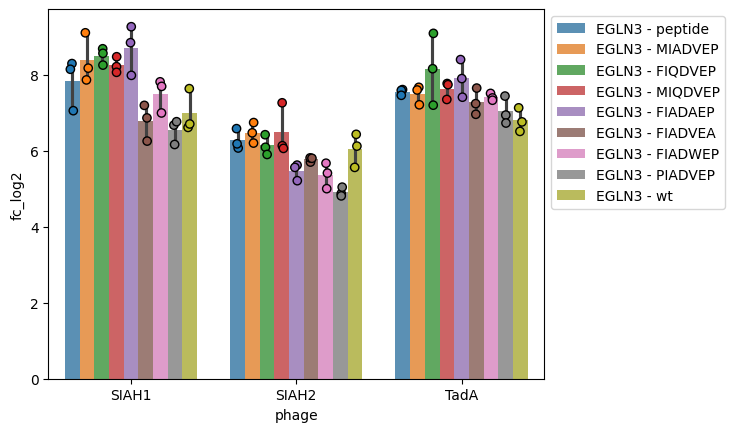

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

_ = bars(df[(~df.substrate.isna()) & (df.substrate != 'asyn')], x='phage', y='fc_log2', hue='substrate')

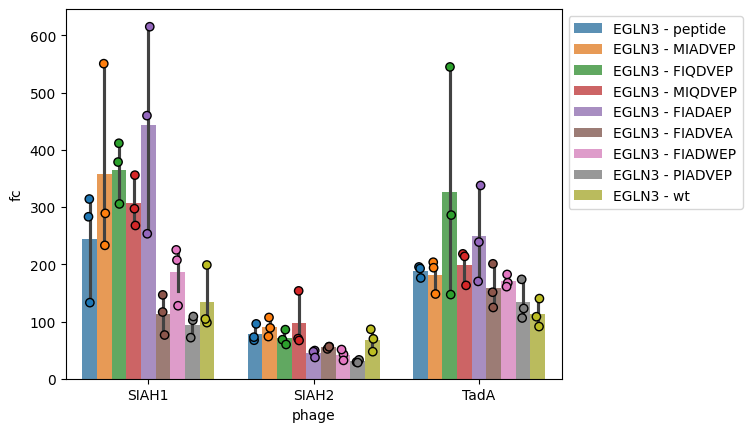

In [13]:
_ = bars(df[(~df.substrate.isna()) & (df.substrate != 'asyn')], x='phage', y='fc', hue='substrate')

Text(0.5, 1.0, 'a-syn 2008')

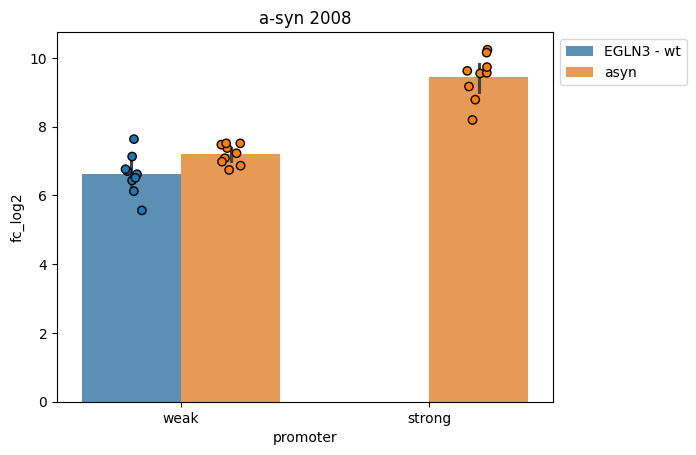

In [17]:
ax = bars(df[(~df.promoter.isna()) & (df.level2 == 2008)], x='promoter', y='fc_log2', hue='substrate')
ax.set_title('a-syn 2008')

Text(0.5, 1.0, 'a-syn 2009')

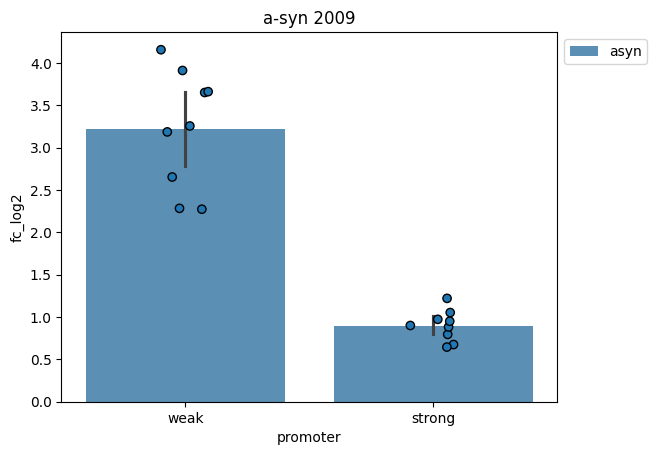

In [18]:
ax = bars(df[(~df.promoter.isna()) & (df.level2 == 2009)], x='promoter', y='fc_log2', hue='substrate')
ax.set_title('a-syn 2009')